In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataframe
data = pd.read_csv('RanBenign_set.csv', index_col=0)
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,8,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
#check class counts
sizes = data['Label'].value_counts(sort=1)
print(sizes)

1    348943
0    249245
Name: Label, dtype: int64


In [4]:
#eliminating unimportant and duplicate columns 
data=data.drop([' Timestamp', 'Flow ID', ' Source IP' ], axis=1)
data=data.drop([' Destination IP', ' Fwd Header Length.1'  ], axis=1)
#eliminating constant columns
data=data.drop([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags' ], axis=1)
data=data.drop([' RST Flag Count', ' CWE Flag Count', ' ECE Flag Count'  ], axis=1)
data=data.drop(['Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate' ], axis=1)
data=data.drop([' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'  ], axis=1)

In [5]:
#check null values
data.isnull().sum()

 Source Port          0
 Destination Port     0
 Protocol             0
 Flow Duration        0
 Total Fwd Packets    0
                     ..
Idle Mean             0
 Idle Std             0
 Idle Max             0
 Idle Min             0
Label                 0
Length: 68, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598188 entries, 0 to 598187
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Source Port                  598188 non-null  int64  
 1    Destination Port             598188 non-null  int64  
 2    Protocol                     598188 non-null  int64  
 3    Flow Duration                598188 non-null  int64  
 4    Total Fwd Packets            598188 non-null  int64  
 5    Total Backward Packets       598188 non-null  int64  
 6   Total Length of Fwd Packets   598188 non-null  float64
 7    Total Length of Bwd Packets  598188 non-null  float64
 8    Fwd Packet Length Max        598188 non-null  float64
 9    Fwd Packet Length Min        598188 non-null  float64
 10   Fwd Packet Length Mean       598188 non-null  float64
 11   Fwd Packet Length Std        598188 non-null  float64
 12  Bwd Packet Length Max         598188 non-nul

In [7]:
data= data[['Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' Source Port', ' Flow IAT Max', ' Flow IAT Min', ' Flow Duration', ' Flow IAT Mean', ' Fwd IAT Min', ' Fwd Packet Length Max', ' Packet Length Std', 'Fwd IAT Total', ' Fwd Packet Length Std', ' Fwd IAT Std', 'Total Length of Fwd Packets', ' Packet Length Variance', ' Max Packet Length', ' Protocol', ' Fwd Packet Length Mean', ' Bwd Packet Length Mean', 'Fwd Packets/s', ' Avg Fwd Segment Size', 'Bwd Packet Length Max', ' Total Length of Bwd Packets', ' Destination Port', ' PSH Flag Count', ' Bwd Packet Length Std', ' Bwd Packet Length Min', ' Average Packet Size', ' Min Packet Length', ' act_data_pkt_fwd','Label']]

In [8]:
data.head()

,Init_Win_bytes_forward,Init_Win_bytes_backward,Source Port,Flow IAT Max,Flow IAT Min,Flow Duration,Flow IAT Mean,Fwd IAT Min,Fwd Packet Length Max,Packet Length Std,...,Bwd Packet Length Max,Total Length of Bwd Packets,Destination Port,PSH Flag Count,Bwd Packet Length Std,Bwd Packet Length Min,Average Packet Size,Min Packet Length,act_data_pkt_fwd,Label
0,65535,353,51023,49105.0,24.0,151054,11619.538462,111.0,821.0,562.514948,...,1418.0,4575.0,443,1,679.532284,0.0,403.642857,0.0,3,0
1,1594,-1,51023,349.0,349.0,349,349.000000,349.0,23.0,13.279056,...,0.0,0.0,443,0,0.000000,0.0,23.000000,0.0,0,0
2,1486,-1,34259,119.0,119.0,119,119.000000,119.0,23.0,13.279056,...,0.0,0.0,443,0,0.000000,0.0,23.000000,0.0,0,0
3,1548,391,55509,37055.0,37055.0,37055,37055.000000,0.0,31.0,17.897858,...,0.0,0.0,443,0,0.000000,0.0,31.000000,0.0,0,0
4,65535,352,44852,62243.0,55.0,178727,14893.916667,172.0,753.0,231.422833,...,168.0,307.0,443,1,75.366722,0.0,124.615385,0.0,3,0


In [9]:
# Separatating & assigning features and target columns to X & y

y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((598188, 30), (598188,))

In [10]:
# Splitting the dataset into train and test sets: 75-25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 100)
X_train.shape, X_test.shape

((448641, 30), (149547, 30))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini", max_depth= 100, min_samples_split= 40, random_state= 0)

In [13]:
%%time
clf.fit(X_train_scaled, y_train)

CPU times: total: 28.1 s
Wall time: 28.3 s


DecisionTreeClassifier(max_depth=100, min_samples_split=40, random_state=0)

In [14]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7718175556848349

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     62023
           1       0.80      0.81      0.81     87524

    accuracy                           0.77    149547
   macro avg       0.76      0.76      0.76    149547
weighted avg       0.77      0.77      0.77    149547



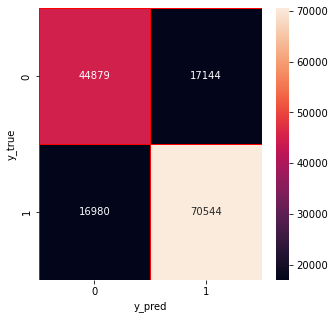

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

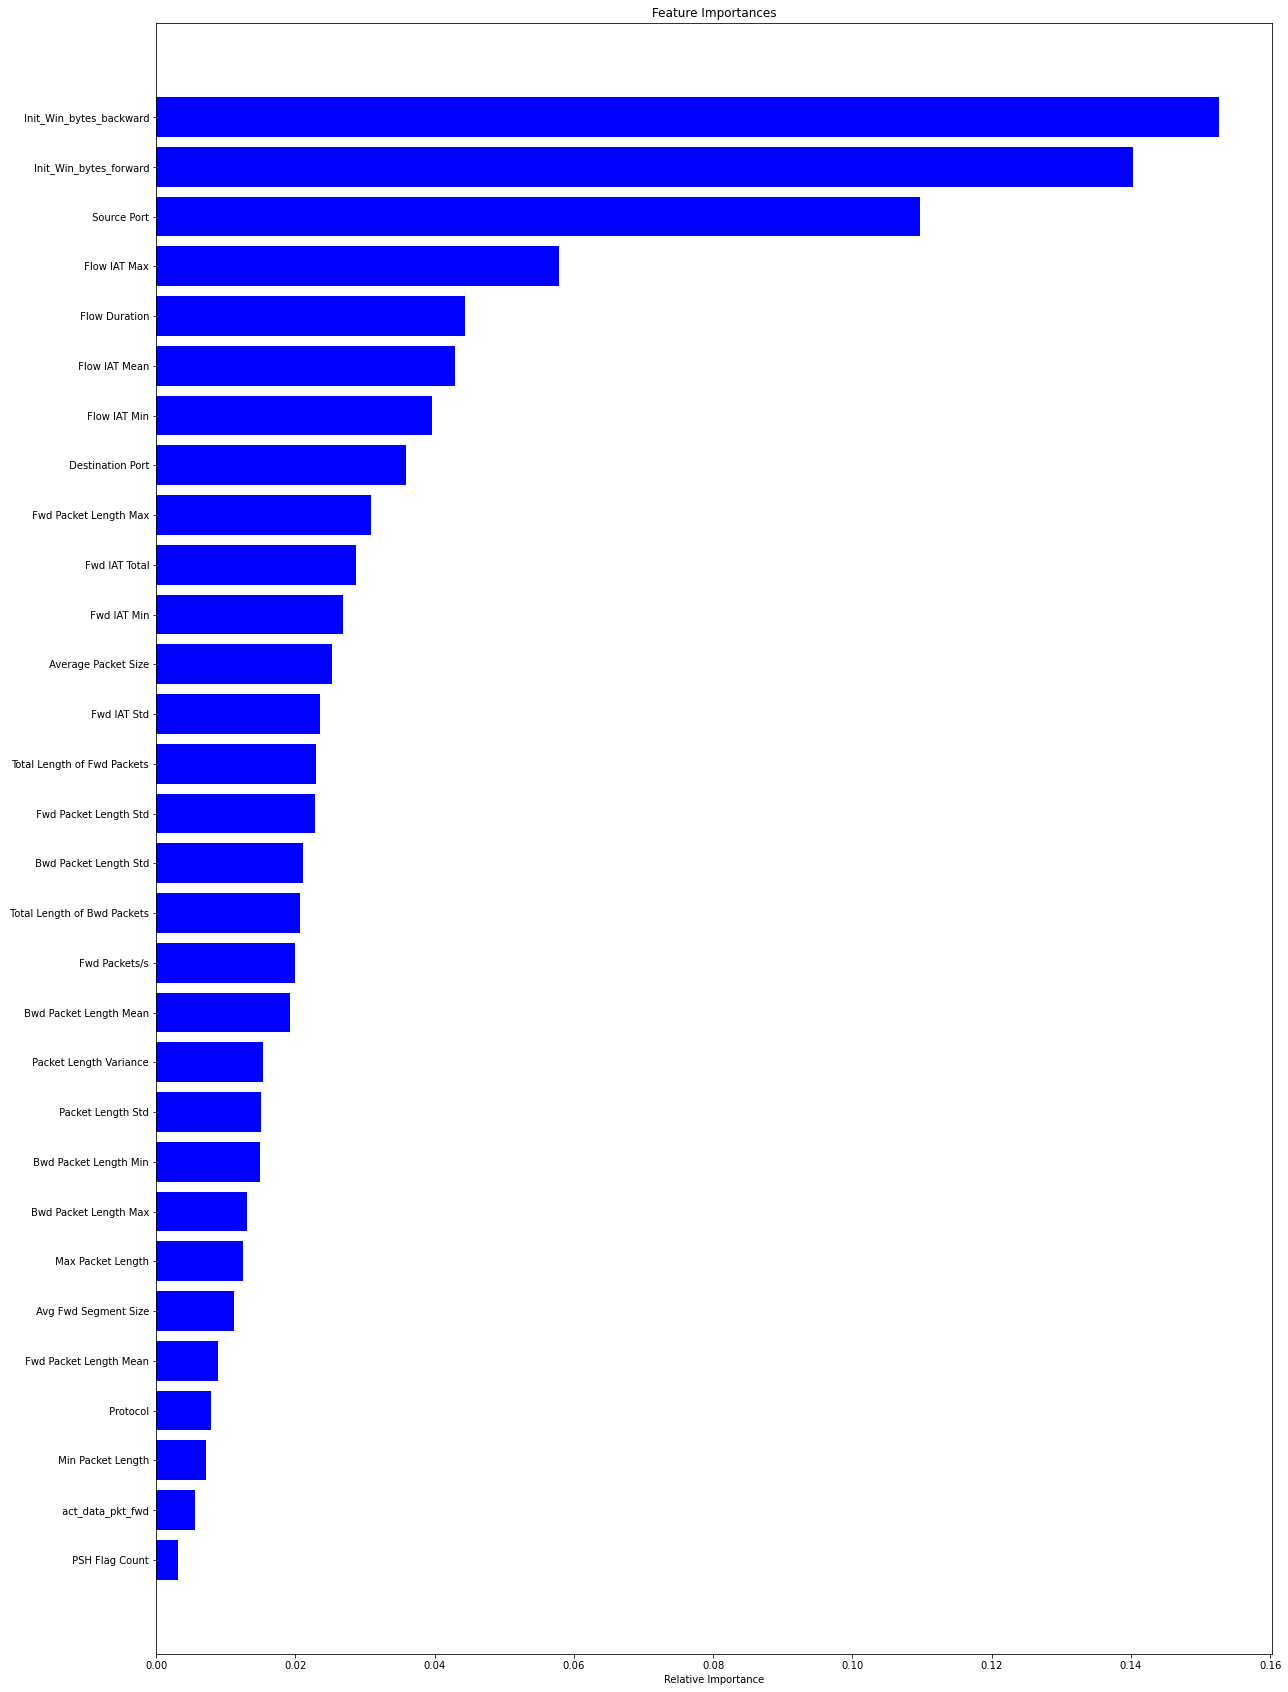

In [18]:
#Feature importances
features=data.columns
importances=clf.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(20,30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features [i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()